This notebook produces the main result for Gemello. This notebook has already computed the result for Latent bayesian melding and FHMM and stored in a Pandas.Panel. We just pull the data from that Panel. Additionally, this notebook computes the main result. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
!ls -lah accuracy.h5

-rw-r--r--  1 nipunbatra  staff   436K Feb  9 18:57 accuracy.h5


In [38]:
accuracy_store = pd.HDFStore("accuracy.h5")

In [39]:
accuracy_store

<class 'pandas.io.pytables.HDFStore'>
File path: accuracy.h5
/FHMM                        wide_table   (typ->appendable,nrows->510,ncols->6,indexers->[major_axis,minor_axis])
/LBM                         wide_table   (typ->appendable,nrows->510,ncols->6,indexers->[major_axis,minor_axis])
/N-NILM                      wide_table   (typ->appendable,nrows->445,ncols->6,indexers->[major_axis,minor_axis])
/Regional average            wide_table   (typ->appendable,nrows->445,ncols->6,indexers->[major_axis,minor_axis])

In [40]:
appliance_name_map = {"fridge":"Fridge","hvac":"HVAC","wm":"Washing\nmachine",
                      "dr":"Dryer","dw":"Dish\nwasher","light":"Lights"}

Now, producing the main result for Gemello. The main computation had been done by FILL THIS UP.

#### ACCURACY on the train set for Gemello

In [41]:
import json
appliances = ["dr","hvac","wm","dw","fridge","light"]
features = ["Static", "Monthly", "Monthly+Static"]

out={}
means = {}
sems = {}
for feature in features:
    out[feature]={}
    means[feature]={}
    sems[feature]={}
    for appliance in appliances:
    
        out[feature][appliance] = {}
        for home in all_homes[appliance]:
            try:
                j = json.load(open("../main-out-new/%s_%s_%d.json" %(appliance, feature, home),'r'))
                out[feature][appliance][int(home)] = j['accuracy']
            except:
                pass
                                     
train_df = pd.DataFrame({k:pd.DataFrame(out[k]).mean() for k in features})


NameError: name 'all_homes' is not defined

In [26]:
means = {}
sems = {}
for approach in ["FHMM","LBM"]:

    fr = accuracy_store[approach]
    means[approach]={}
    sems[approach] = {}

    for appliance in ['hvac','fridge','dw','dr','light','wm']:
        if appliance=="hvac":
            start, stop=5, 11
        else:
            start, stop=1, 13
        
        temp = fr[appliance]
        if approach=='N-NILM':
            temp=temp.T
        means[approach][appliance_name_map[appliance]] = temp.ix[range(start,stop)].mean().mean()
        sems[approach][appliance_name_map[appliance]] = temp.ix[range(start,stop)].mean().sem()

In [27]:
APPROACH="Gemello"

In [28]:
means.update({APPROACH: {'Dish\nwasher': 27.333401871684234,
 'Dryer': 33.052222078385938,
 'Fridge': 68.541552745826976,
 'HVAC': 76.239355252614146,
 'Lights': 42.757293980395275,
 'Washing\nmachine': 57.272795296939734} })

In [29]:
sems.update({APPROACH:{'Dish\nwasher': 4.4952334747643938,
 'Dryer': 5.486932783231973,
 'Fridge': 4.3774018060910178,
 'HVAC': 2.4278829051111015,
 'Lights': 6.6281736354818035,
 'Washing\nmachine': 6.9256405458935992} })

In [30]:
main_df = pd.DataFrame(means)
se = pd.DataFrame(sems)

In [31]:
main_df

FHMM    Gemello        LBM
Dish\nwasher       0.430750  27.333402  16.495110
Dryer             10.529382  33.052222   5.940615
Fridge            38.975759  68.541553  71.822239
HVAC              61.039103  76.239355  55.722782
Lights            33.414945  42.757294  11.290612
Washing\nmachine   0.130659  57.272795  29.972193

In [32]:
main_df = main_df.ix[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']]
se_df =se.ix[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']]

In [33]:
from common_functions import latexify, format_axes

In [34]:
main_df = main_df[["FHMM","LBM",APPROACH]]

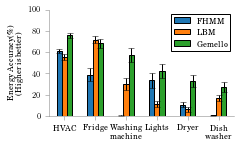

In [35]:
#latexify(columns=2, fig_height=2.6)
latexify(columns=1)

tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

main_df.plot(kind="bar",yerr=se_df,rot=0, colors=tableau20blind[::2])
plt.ylim((0,100))
plt.ylabel("Energy Accuracy(\%)\n(Higher is better)");
format_axes(plt.gca())
"""
ax = plt.gca()
for p in ax.patches:
    if p.get_height()<20:
        color="black"
        offset=5
    else:
        color="black"
        offset=-15
    ax.annotate(str(int(round(p.get_height(),0))), (p.get_x(), p.get_height() +offset), color=color, fontsize=6)
"""

plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/main_new.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/main_new.png",bbox_inches="tight")

In [22]:
main_df[["FHMM","LBM","Regional average","N-NILM"]]

FHMM        LBM  Regional average  N-NILM
HVAC              61.039103  55.722782         48.698197     NaN
Fridge            38.975759  71.822239         50.157783     NaN
Washing\nmachine   0.130659  29.972193         27.360420     NaN
Lights            33.414945  11.290612         43.866968     NaN
Dryer             10.529382   5.940615         39.250599     NaN
Dish\nwasher       0.430750  16.495110         25.787515     NaN

In [13]:
main_df[["FHMM","LBM","Regional average","N-NILM"]]

FHMM        LBM  Regional average     N-NILM
HVAC              61.039103  55.722782         48.698197  79.247215
Fridge            38.975759  71.822239         50.157783  81.121122
Washing\nmachine   0.130659  29.972193         27.360420  65.535383
Lights            33.414945  11.290612         43.866968  49.873465
Dryer             10.529382   5.940615         39.250599  41.278503
Dish\nwasher       0.430750  16.495110         25.787515  44.113923

In [33]:
main_df['N-NILM'].to_dict()

{'Dish\nwasher': 42.587760336179386,
 'Dryer': 39.344495390193956,
 'Fridge': 77.740659617682567,
 'HVAC': 79.208158885529826,
 'Lights': 47.066093958195509,
 'Washing\nmachine': 64.363109767113215}